In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import time
import re

In [11]:
launch = pd.read_csv('../data/app_launch_logs.csv')
launch.shape[0]

8493878

In [12]:
launch.head()

,user_id,launch_type,date
0,10157996,0,129
1,10139583,0,129
2,10277501,0,129
3,10099847,0,129
4,10532773,0,129


# 去重
题目对用一个用户同一天内登录次数和登录方式不做要求，只要一天内登录了就算一次

In [13]:
launch.isnull().sum()

user_id        0
launch_type    0
date           0
dtype: int64

In [14]:
launch.drop_duplicates().shape[0]

8492342

In [15]:
# 在删除之后要重新建立索引
launch=launch.drop_duplicates()
launch.index = range(launch.shape[0])

In [ ]:
launch['launch_type'].value_counts() #0类占主导，这个类别的特征就可以忽略

launch_type
0    8109385
1     382957
Name: count, dtype: int64

In [19]:
launch['user_id'].unique().__len__()

600000

# 训练集和测试集日期存在重合
但是大多数时候，同个用户的训练日期会早于测试日期

In [25]:
launch.loc[:,'date'].min(),launch.loc[:,'date'].max()

(np.int64(100), np.int64(222))

# 用户登录大趋势

In [28]:
df = launch.groupby('date').count()
df.head()

,user_id,launch_type
date,,
100,39302,39302
101,39313,39313
102,39642,39642
103,39054,39054
104,36304,36304


([<matplotlib.axis.XTick at 0x21b08f99090>,
 [Text(100, 0, '100'),
  Text(107, 0, '107'),
  Text(114, 0, '114'),
  Text(121, 0, '121'),
  Text(128, 0, '128'),
  Text(135, 0, '135'),
  Text(142, 0, '142'),
  Text(149, 0, '149'),
  Text(156, 0, '156'),
  Text(163, 0, '163'),
  Text(170, 0, '170'),
  Text(177, 0, '177'),
  Text(184, 0, '184'),
  Text(191, 0, '191'),
  Text(198, 0, '198'),
  Text(205, 0, '205'),
  Text(212, 0, '212'),
  Text(219, 0, '219')])

findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not found.
findfont: Font family 'Simher' not

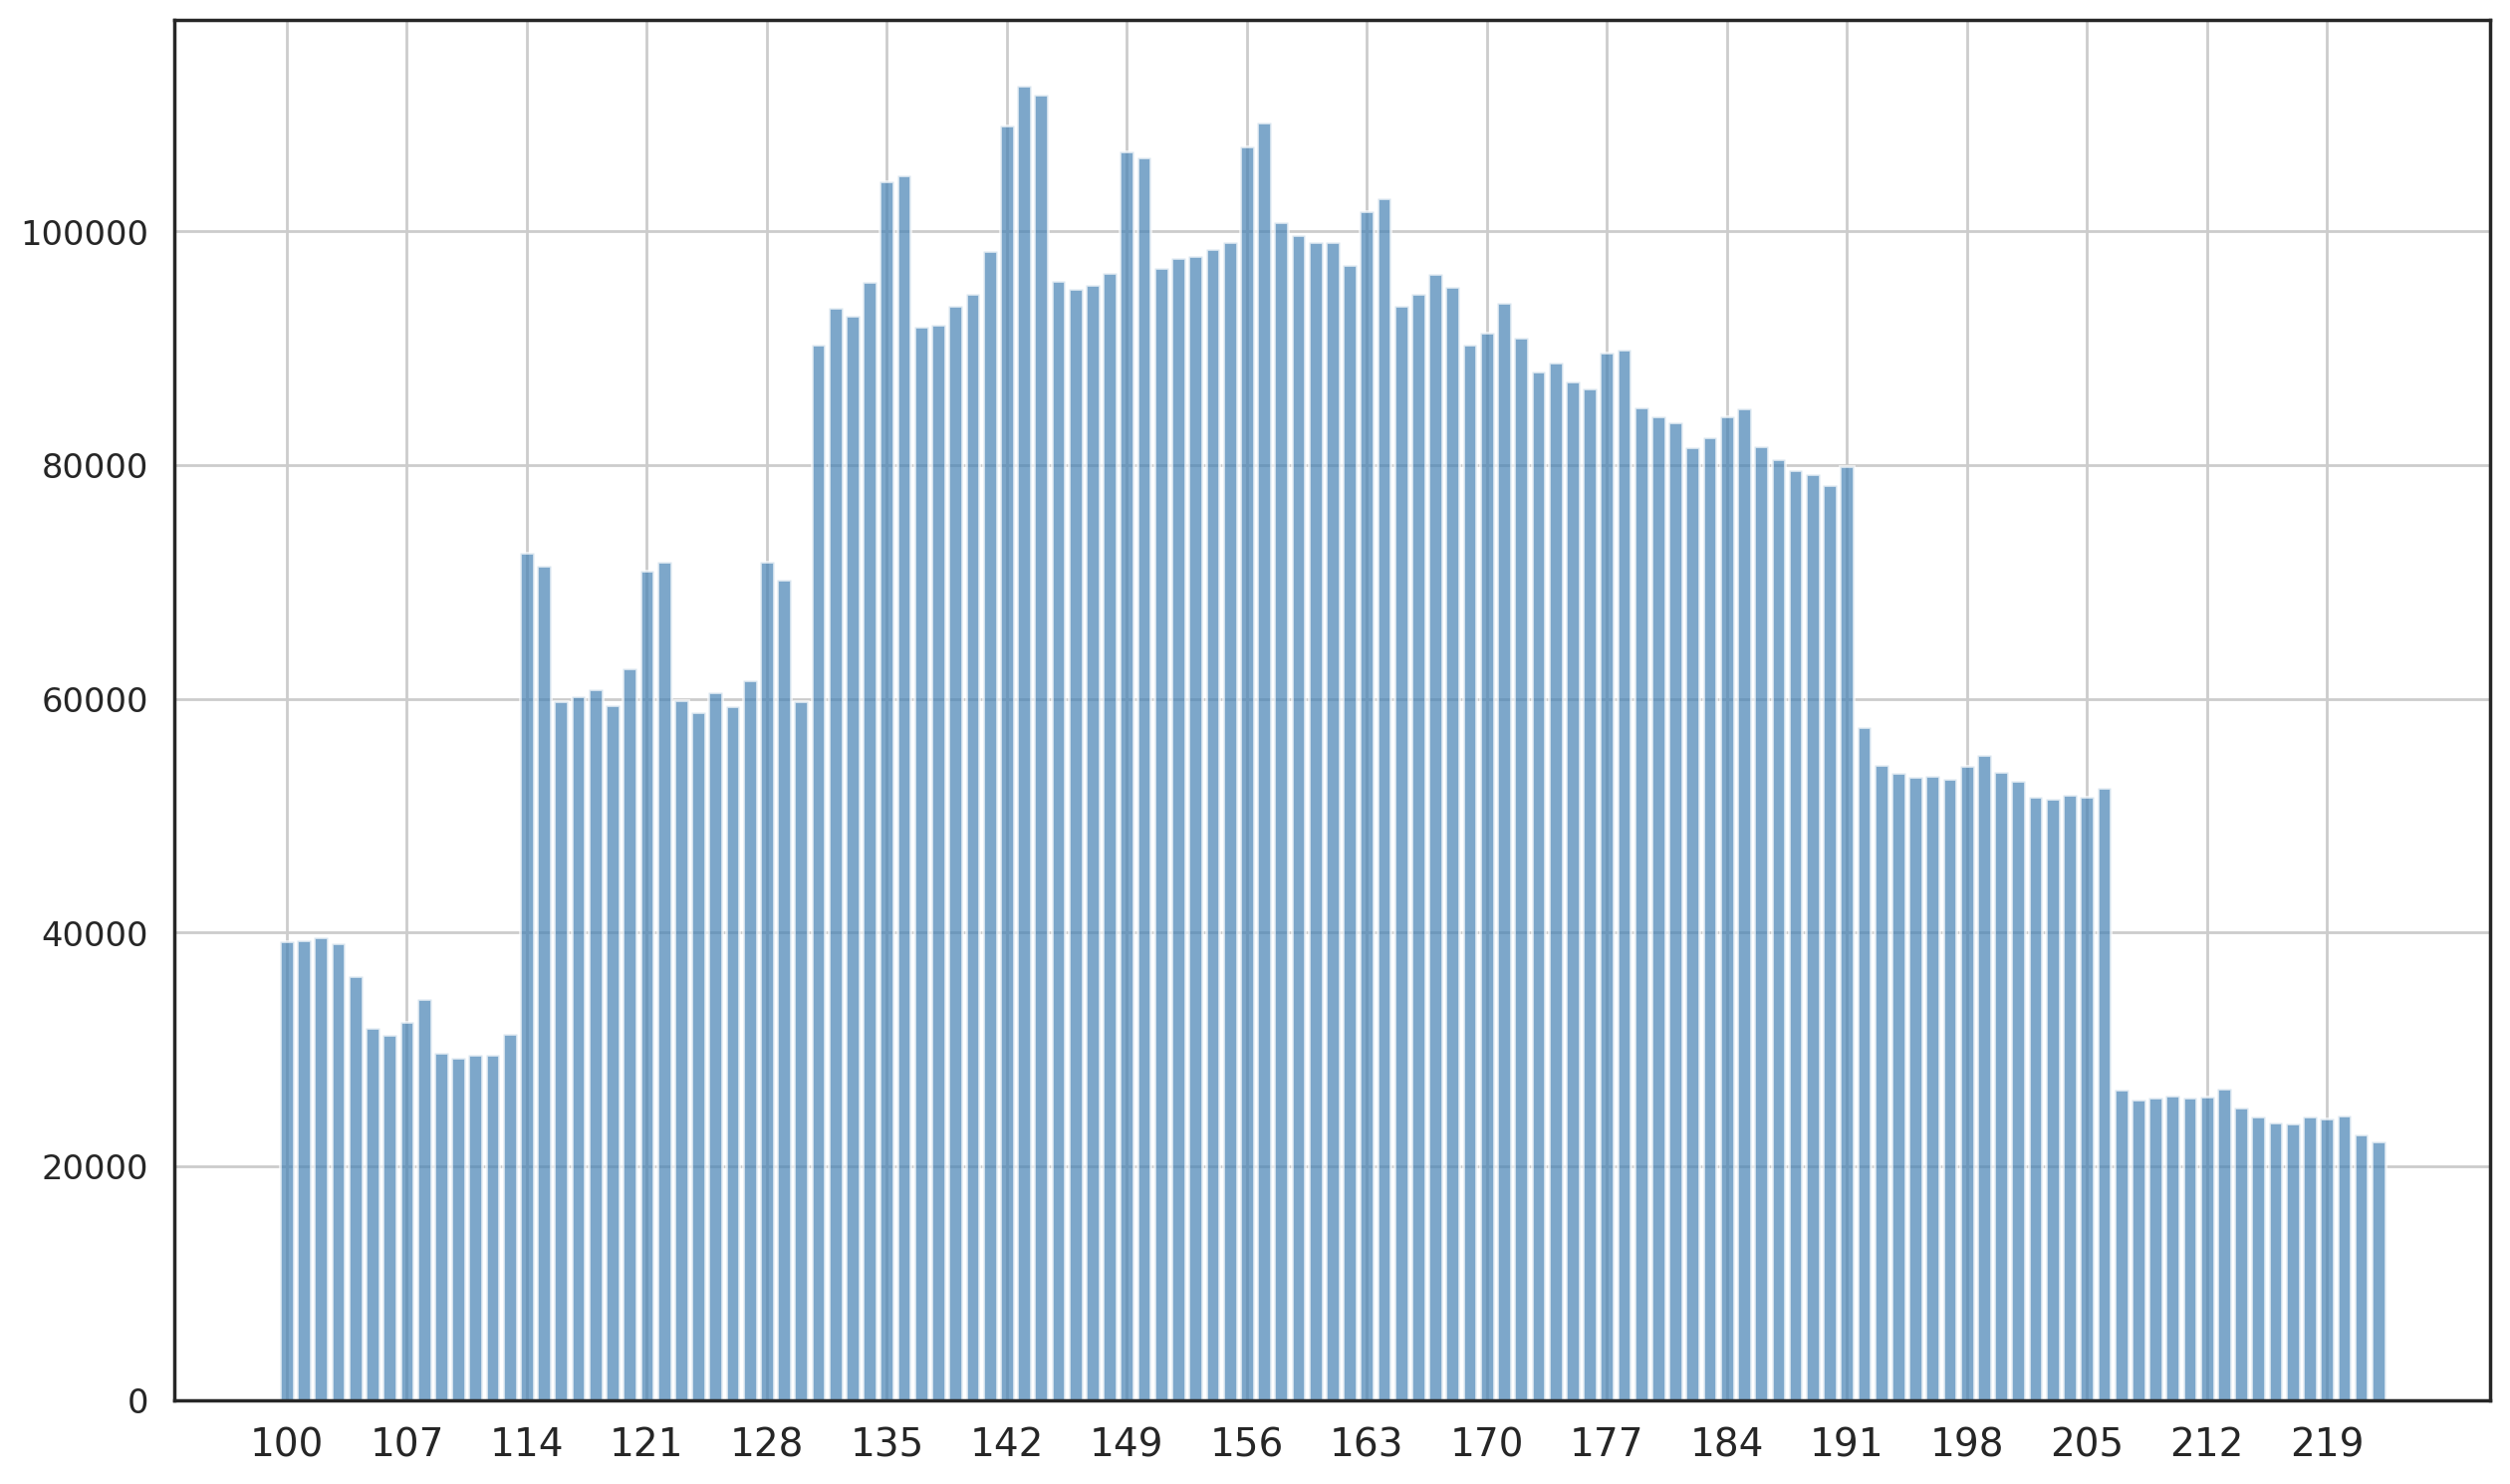

In [42]:
plt.figure(figsize=(15,9),dpi=200)
plt.bar(df.index,df['user_id'],color='steelblue',alpha=0.7)
plt.grid()
plt.xticks(ticks=range(100,221,7),fontsize=14)

可以看出大概呈现出一个正态分布，且每周都会有一个高峰